In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import numpy as np
from sklearn.metrics import mean_squared_error, explained_variance_score
import math
#from sklearn.externals import joblib

#Label Encoding
#from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


#To check for model training time
import time

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [5]:
df = pd.read_csv(r'F:\Kabir\CSUN\Comp542\sampled_and_preprocessed_csv_team_4.csv')

In [6]:
df.head()

,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,humidity,visibility,icon,windBearing,moonPhase,precipIntensityMax
0,5,7,0,6,5,7.0,0.44,1.0,0.75,10.000,1,240,0.68,0.1064
1,5,7,0,10,6,9.0,0.44,1.0,0.70,10.000,5,303,0.72,0.0001
2,0,8,0,6,5,7.0,1.08,1.0,0.63,10.000,2,295,0.72,0.0000
3,6,11,1,0,9,7.5,1.11,1.0,0.56,9.959,4,76,0.21,0.0001
4,6,11,1,5,11,7.5,1.11,1.0,0.86,4.054,6,57,0.30,0.1252


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source              4997 non-null   int64  
 1   destination         4997 non-null   int64  
 2   cab_type            4997 non-null   int64  
 3   product_id          4997 non-null   int64  
 4   name                4997 non-null   int64  
 5   price               4997 non-null   float64
 6   distance            4997 non-null   float64
 7   surge_multiplier    4997 non-null   float64
 8   humidity            4997 non-null   float64
 9   visibility          4997 non-null   float64
 10  icon                4997 non-null   int64  
 11  windBearing         4997 non-null   int64  
 12  moonPhase           4997 non-null   float64
 13  precipIntensityMax  4997 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 546.7 KB


In [8]:
df.tail()

,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,humidity,visibility,icon,windBearing,moonPhase,precipIntensityMax
4992,8,4,1,2,1,42.5,4.53,1.0,0.68,10.000,5,45,0.27,0.0074
4993,2,4,1,2,1,41.5,4.72,1.0,0.69,10.000,4,242,0.89,0.0007
4994,2,4,1,2,1,40.5,4.76,1.0,0.51,9.898,4,165,0.24,0.0000
4995,4,3,1,2,1,42.0,4.48,1.0,0.69,9.732,2,272,0.33,0.0178
4996,2,0,0,7,7,2.5,1.53,1.0,0.69,10.000,2,293,0.72,0.0001


In [9]:
list_of_columns = list(df.columns)
#print("list of cols", list_of_columns, type(list_of_columns))
list_of_columns.remove('price')
x_columns = list_of_columns
y_columns = ['price']
print('List X : ', x_columns,'\nList Y :', y_columns)

List X :  ['source', 'destination', 'cab_type', 'product_id', 'name', 'distance', 'surge_multiplier', 'humidity', 'visibility', 'icon', 'windBearing', 'moonPhase', 'precipIntensityMax'] 
List Y : ['price']


In [10]:
#Splitting DF.

x = df[x_columns]
y = df[y_columns]
print('X DF : ', x.head())
print('Y DF : ',y.head())

X DF :     source  destination  cab_type  product_id  name  distance  \
0       5            7         0           6     5      0.44   
1       5            7         0          10     6      0.44   
2       0            8         0           6     5      1.08   
3       6           11         1           0     9      1.11   
4       6           11         1           5    11      1.11   

   surge_multiplier  humidity  visibility  icon  windBearing  moonPhase  \
0               1.0      0.75      10.000     1          240       0.68   
1               1.0      0.70      10.000     5          303       0.72   
2               1.0      0.63      10.000     2          295       0.72   
3               1.0      0.56       9.959     4           76       0.21   
4               1.0      0.86       4.054     6           57       0.30   

   precipIntensityMax  
0              0.1064  
1              0.0001  
2              0.0000  
3              0.0001  
4              0.1252  
Y DF :     p

In [11]:
# Split dataset to training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [13]:
# Fit Regression Model
start_time = time.time()
reg = RandomForestRegressor(n_estimators=70, max_depth=30, n_jobs=-1, warm_start=True, oob_score=True)
reg.fit(X_train,y_train)
end_time = time.time()

print("Model training Time (seconds): ", round(end_time - start_time, 2))

C:\Users\isha\zoro_venv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model training Time (seconds):  0.84


In [14]:
# Calculate Training and Test Accuracy
training_accuracy = reg.score(X_train, y_train)
test_accuracy = reg.score(X_test, y_test)

In [27]:
# Calculate Root mean squared error
mse_train = mean_squared_error(reg.predict(X_train),y_train)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(reg.predict(X_test),y_test)
rmse_test = np.sqrt(mse_test)
print("Training Accuracy = %0.3f \nTest Accuracy = %0.3f \nRMSE (train) = %0.3f \nRMSE (test) = %0.3f \nMSE (train) = %0.3f \nMSE (test) = %0.3f"\
      % (training_accuracy, test_accuracy, rmse_train, rmse_test, mse_train, mse_test))

Training Accuracy = 0.994 
Test Accuracy = 0.963 
RMSE (train) = 0.707 
RMSE (test) = 1.665 
MSE (train) = 0.500 
MSE (test) = 2.772


In [16]:
print("Out of Bag Score = %0.3f" %(reg.oob_score_))

Out of Bag Score = 0.954


In [17]:
import joblib


joblib.dump(reg, r'F:\Kabir\CSUN\Comp542\trained_random_forest_final_full_team_4.pkl')

['F:\\Kabir\\CSUN\\Comp542\\trained_random_forest_final_full_team_4.pkl']

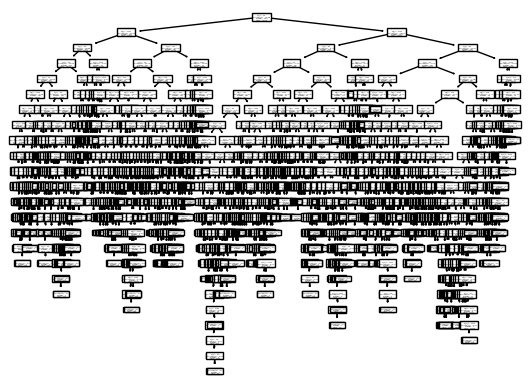

Tree Plotting Time (seconds) :  217.24


In [25]:
start_time = time.time()

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

plt.figure()
from sklearn import tree
tree.plot_tree(reg.estimators_[0])
plt.savefig(r'F:\Kabir\CSUN\Comp542\RF_team_4_tree.eps',format='eps',bbox_inches = "tight")
plt.show()
#fig.savefig(r'F:\Kabir\CSUN\Comp542\rf_tree_full.png')
end_time = time.time()

print("Tree Plotting Time (seconds) : ", round(end_time - start_time, 2))

In [26]:
print("EXP Variance Score Train : ", explained_variance_score(reg.predict(X_train),y_train))
print("EXP Variance Score Test : ", explained_variance_score(reg.predict(X_test),y_test))

EXP Variance Score Train :  0.9933978301901838
EXP Variance Score Test :  0.962688249317548
